In [71]:
#Loading all the modules and packages

import pandas as pd
import numpy as np
import seaborn as sbr
import matplotlib.pyplot as plt

In [72]:
#Loading the data

data = pd.read_csv("fifadata.csv")

data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [73]:
#Cleaning the data, removing first column and removing links, because they aren't going to influence our choice, also, we should delete NA's values

fifa = pd.DataFrame(data, columns=['Name', 'Age',  'Nationality', 'Club', 'Weight', 'Overall', 'Potential','Position', 'Jersey Number'])

fifa.head()

,Name,Age,Nationality,Club,Weight,Overall,Potential,Position,Jersey Number
0,L. Messi,31,Argentina,FC Barcelona,159lbs,94,94,RF,10.0
1,Cristiano Ronaldo,33,Portugal,Juventus,183lbs,94,94,ST,7.0
2,Neymar Jr,26,Brazil,Paris Saint-Germain,150lbs,92,93,LW,10.0
3,De Gea,27,Spain,Manchester United,168lbs,91,93,GK,1.0
4,K. De Bruyne,27,Belgium,Manchester City,154lbs,91,92,RCM,7.0


In [74]:
#Searching for Null values and deleting

fifa.isnull().sum()
fifa = fifa.dropna()

In [75]:
#To explore our data, first we convert the string to integer in Overall and Potential columns

fifa['Overall'] = pd.to_numeric(fifa['Overall'])
fifa['Potential'] = pd.to_numeric(fifa['Potential'])

top = fifa.Name[(fifa.Overall > 85) & (fifa.Potential > 85)]
print(top)

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
            ...        
72            M. Pjanić
73           M. Benatia
74              M. Özil
75          Fernandinho
76              Iniesta
Name: Name, Length: 77, dtype: object


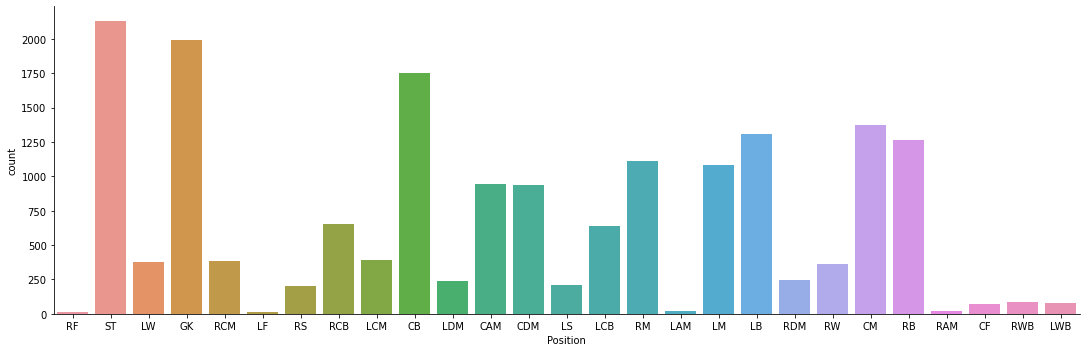

In [76]:
#Visualizing our data
sbr.catplot(x='Position', kind = 'count', data = fifa, height = 5, aspect = 3)

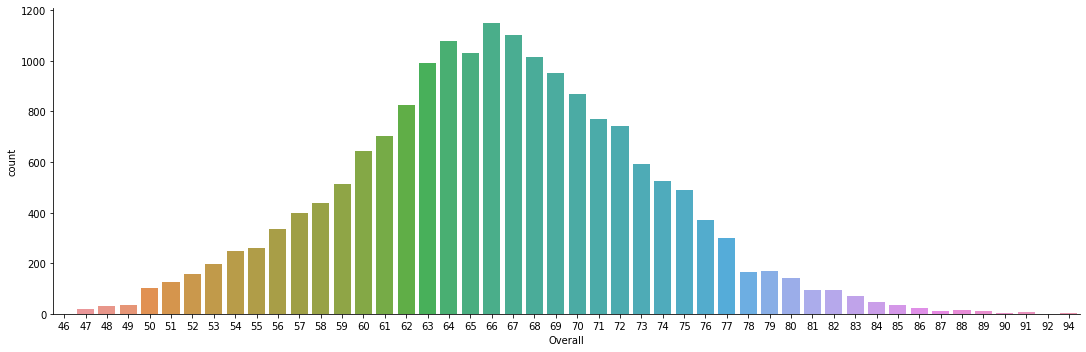

In [77]:
#Visualizing the best by the Overall value
sbr.catplot(x='Overall', kind = 'count', data = fifa, height = 5, aspect = 3)

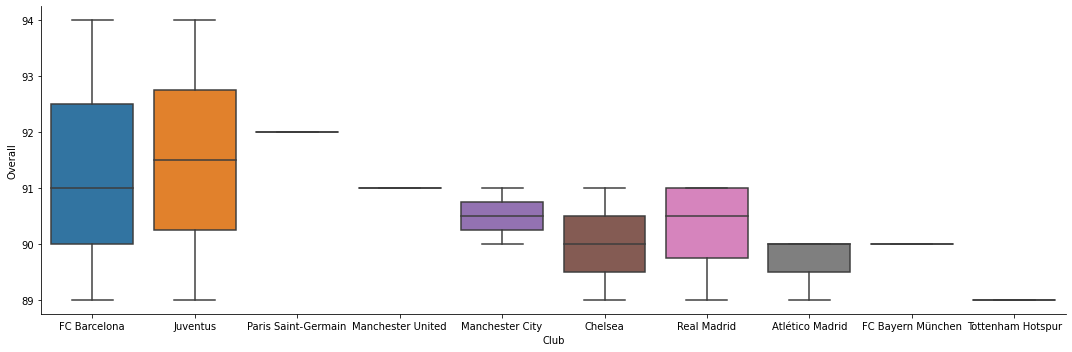

In [78]:
sbr.catplot(x='Club', y='Overall',kind='box', data=fifa[0:20], height= 5, aspect= 3)


Text(0, 0.5, 'GK Score')

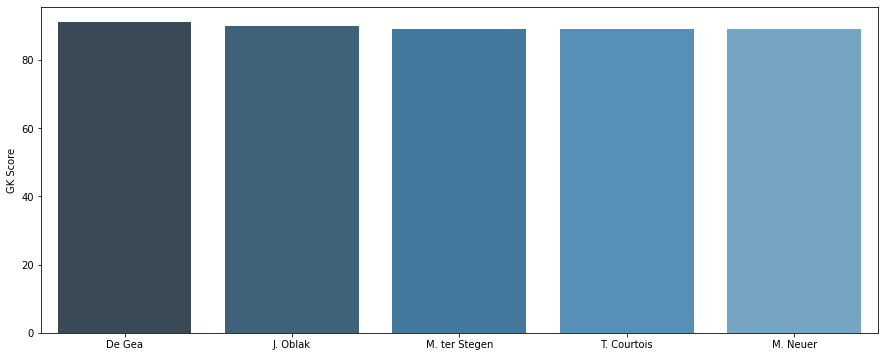

In [79]:
#Since we are using a 4-3-3 position, we have:
"""
1 GK
2 CB
1 LB and 1 RB
1 DM
2 CM
1 LW and 1 RW
1 CF
"""
#Best player for GK position
plt.figure(figsize=(15,6))
sd = fifa[(fifa['Position'] == 'GK')].sort_values('Overall', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['Overall']))
sbr.barplot(x2, y2, palette=sbr.color_palette('Blues_d'))
plt.ylabel('GK Score')

Text(0, 0.5, 'LB Score')

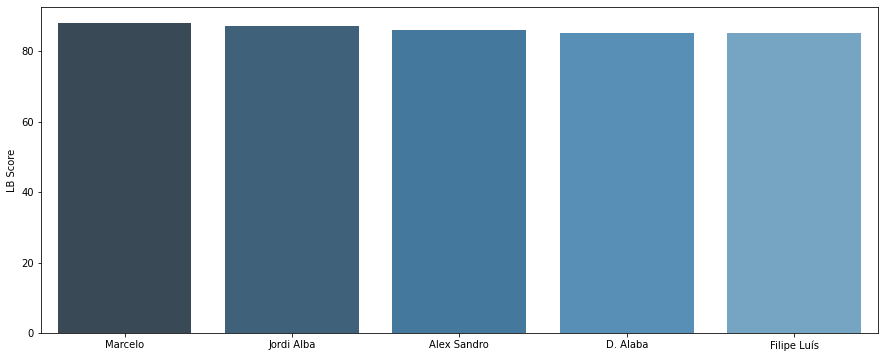

In [80]:
#Best player for LB position
plt.figure(figsize=(15,6))
sd = fifa[(fifa['Position'] == 'LB')].sort_values('Overall', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['Overall']))
sbr.barplot(x2, y2, palette=sbr.color_palette('Blues_d'))
plt.ylabel('LB Score')

Text(0, 0.5, 'RB Score')

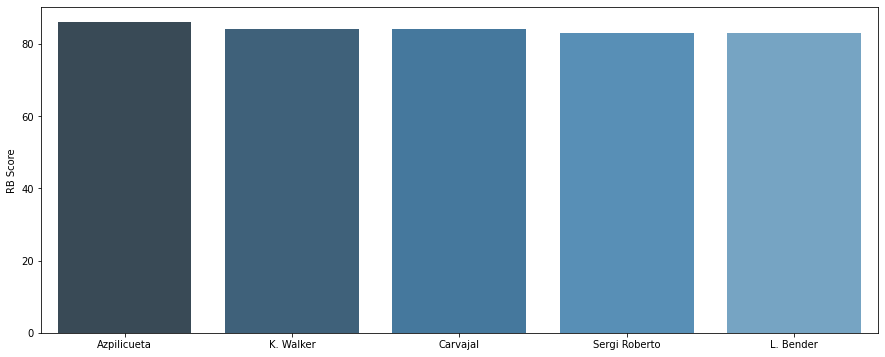

In [81]:
#Best player for RB position
plt.figure(figsize=(15,6))
sd = fifa[(fifa['Position'] == 'RB')].sort_values('Overall', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['Overall']))
sbr.barplot(x2, y2, palette=sbr.color_palette('Blues_d'))
plt.ylabel('RB Score')

Text(0, 0.5, 'CB Score')

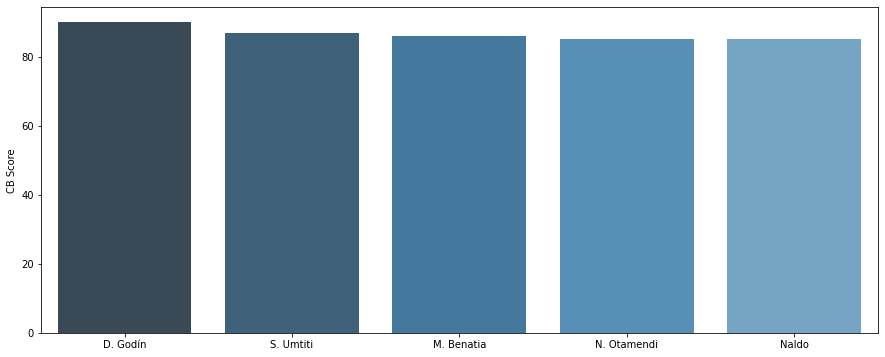

In [98]:
#Best player for CB position
plt.figure(figsize=(15,6))
sd = fifa[(fifa['Position'] == 'CB')].sort_values('Overall', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['Overall']))
sbr.barplot(x2, y2, palette=sbr.color_palette('Blues_d'))
plt.ylabel('CB Score')

Text(0, 0.5, 'CDM Score')

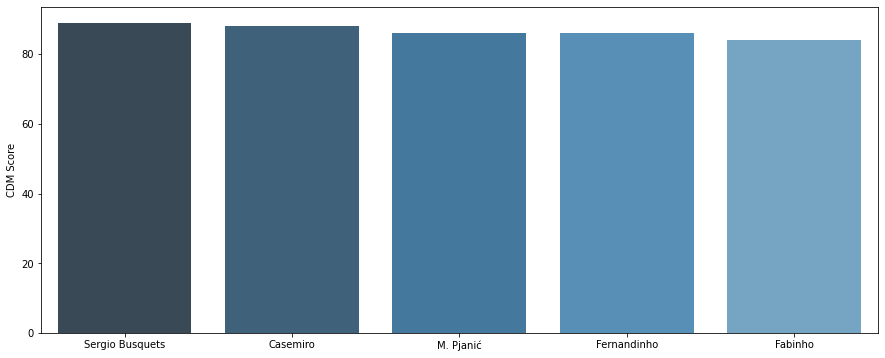

In [100]:
#Best player for CDM position
plt.figure(figsize=(15,6))
sd = fifa[(fifa['Position'] == 'CDM')].sort_values('Overall', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['Overall']))
sbr.barplot(x2, y2, palette=sbr.color_palette('Blues_d'))
plt.ylabel('CDM Score')

Text(0, 0.5, 'CM Score')

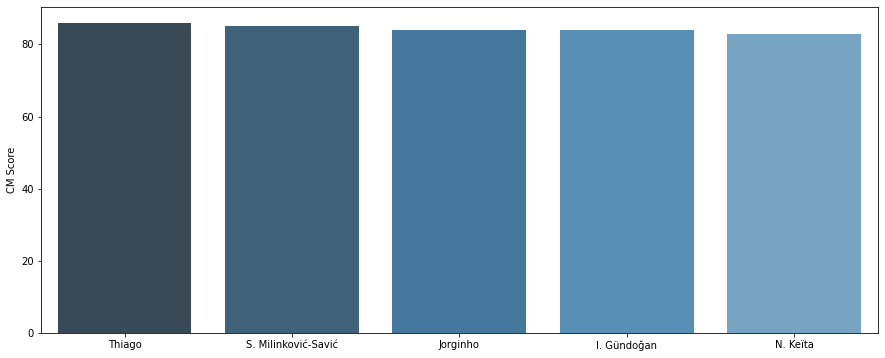

In [83]:
#Best player for CM position
plt.figure(figsize=(15,6))
sd = fifa[(fifa['Position'] == 'CM')].sort_values('Overall', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['Overall']))
sbr.barplot(x2, y2, palette=sbr.color_palette('Blues_d'))
plt.ylabel('CM Score')

Text(0, 0.5, 'RW Score')

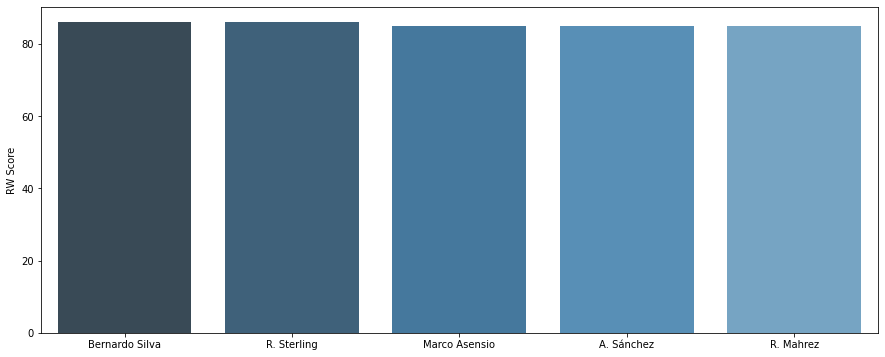

In [84]:
#Best player for RW position
plt.figure(figsize=(15,6))
sd = fifa[(fifa['Position'] == 'RW')].sort_values('Overall', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['Overall']))
sbr.barplot(x2, y2, palette=sbr.color_palette('Blues_d'))
plt.ylabel('RW Score')

Text(0, 0.5, 'LW Score')

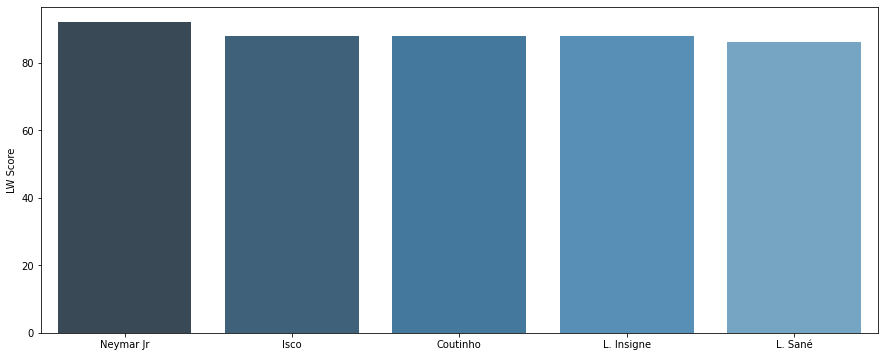

In [85]:
#Best player for LW position
plt.figure(figsize=(15,6))
sd = fifa[(fifa['Position'] == 'LW')].sort_values('Overall', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['Overall']))
sbr.barplot(x2, y2, palette=sbr.color_palette('Blues_d'))
plt.ylabel('LW Score')

Text(0, 0.5, 'CF Score')

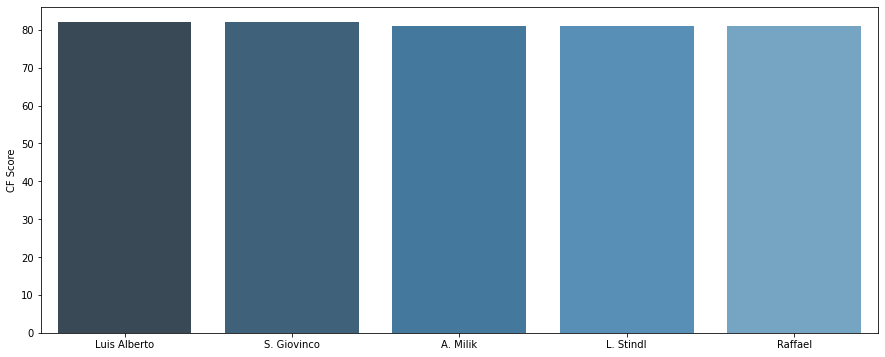

In [94]:
#Best player for CF position
plt.figure(figsize=(15,6))
sd = fifa[(fifa['Position'] == 'CF')].sort_values('Overall', ascending = False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['Overall']))
sbr.barplot(x2, y2, palette=sbr.color_palette('Blues_d'))
plt.ylabel('CF Score')

In [101]:
fifa_skills = pd.DataFrame(data, columns= ['Name',"Club",'Position','Dribbling','Overall'])

team = fifa_skills[(fifa_skills.Name == 'De Gea')|
                    (fifa_skills.Name == 'Azpilicueta')|
                    (fifa_skills.Name == 'Jordi Alba')|
                    (fifa_skills.Name == 'Thiago')|
                    (fifa_skills.Name == 'S. Milinković-Savić')|
                    (fifa_skills.Name == 'D. Godín')|
                    (fifa_skills.Name == 'S. Umtiti')|
                   (fifa_skills.Name == 'Sergio Busquets')|
                   (fifa_skills.Name == 'Neymar Jr')|
                   (fifa_skills.Name == 'Bernardo Silva')]
 
print(team)

                   Name                 Club Position  Dribbling  Overall
2             Neymar Jr  Paris Saint-Germain       LW       96.0       92
3                De Gea    Manchester United       GK       18.0       91
12             D. Godín      Atlético Madrid       CB       53.0       90
20      Sergio Busquets         FC Barcelona      CDM       80.0       89
42            S. Umtiti         FC Barcelona       CB       69.0       87
49           Jordi Alba         FC Barcelona       LB       80.0       87
56       Bernardo Silva      Manchester City       RW       92.0       86
67               Thiago    FC Bayern München       CM       90.0       86
69          Azpilicueta              Chelsea       RB       69.0       86
78  S. Milinković-Savić                Lazio       CM       86.0       85
